In [1]:
import netCDF4 as nc
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
import datetime
import pandas as pd 
import math
from scipy import interpolate

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

import warnings
warnings.filterwarnings("ignore")

/home/imachuca/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [6]:
def get_nutrient_profile(file, sheet, nutrient):
    df_data = pd.read_excel(file, sheetname=sheet)
    
    if nutrient == 'phosphate':
        nutrient_varb = 'PO4\n[mmol/m3]'
    if nutrient == 'nitrate':
        nutrient_varb = 'NO3\n[mmol/m3]'
    
    print(nutrient)
    
    nut = np.array(df_data[nutrient_varb])
    
    salt = np.array(df_data['Salt\n[PSS-78]      '])
    lat = np.array(df_data['LAT DEG'])
    lon = np.array(df_data['LON DEG'])
    time = np.array(df_data['Cast Start Time [UTC]'])
    
    lat_all = []
    lon_all = []
    time_all = []
    salt_all = []
    nut_all = []
    inds = []
    
    for i in (np.where(np.logical_and(lat>=70, lat<=71))[0]):
        if np.logical_and(lon[i]>=139, lon[i]<=140):
            inds.append(i)
            lat_all.append(lat[i])
            lon_all.append(lon[i])
            time_all.append(time[i])
            salt_all.append(salt[i])
            nut_all.append(nut[i])
        else:
            pass
        
    lat_all = np.array(lat_all)
    lon_all = np.array(lon_all)
    time_all = np.array(time_all)
    salt_all = np.array(salt_all)
    nut_all = np.array(nut_all)
    
    print(np.unique(lat_all))
    print(np.unique(lon_all))
    print(inds)
    print(time_all)
    
    nut_smooth, salt_new = smooth_nut(nut_all, salt_all)
    
    print(lat_all.shape, salt_new.shape, nut_smooth.shape)
    
    np.savetxt('../thesis/files/'+nutrient+'_info.out', (lat_all, lon_all, time_all), delimiter=',') 

    np.savetxt('../thesis/files/'+nutrient+'_prof.out', (salt_new, nut_smooth), delimiter=',') 
    
    return nut_smooth, salt_new

In [7]:
def smooth_nut(nut_all, salt_all):
    idx_finite = np.isfinite(nut_all)
    f_interp = interpolate.interp1d(salt_all[idx_finite], nut_all[idx_finite], fill_value='extrapolate')

    salt_new = np.arange(np.nanmin(salt_all), np.nanmax(salt_all), 0.5)#0.01
    nut_new = f_interp(salt_new)

    nut_smooth = np.copy(nut_new)
    return nut_smooth, salt_new

In [8]:
file = './LSSL_Geochemistry2009.xls'
sheet = '2009-20_LSSL_Chem'

nutrient = 'phosphate'
PO4_smooth, salt_new = get_nutrient_profile(file, sheet, nutrient)

nutrient = 'nitrate'
NO3_smooth, salt_new = get_nutrient_profile(file, sheet, nutrient)

phosphate
[70 71]
[139 140]
[214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295]
['2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.000000000'
 '2009-09-24T22:50:38.000000000' '2009-09-24T22:50:38.0000000

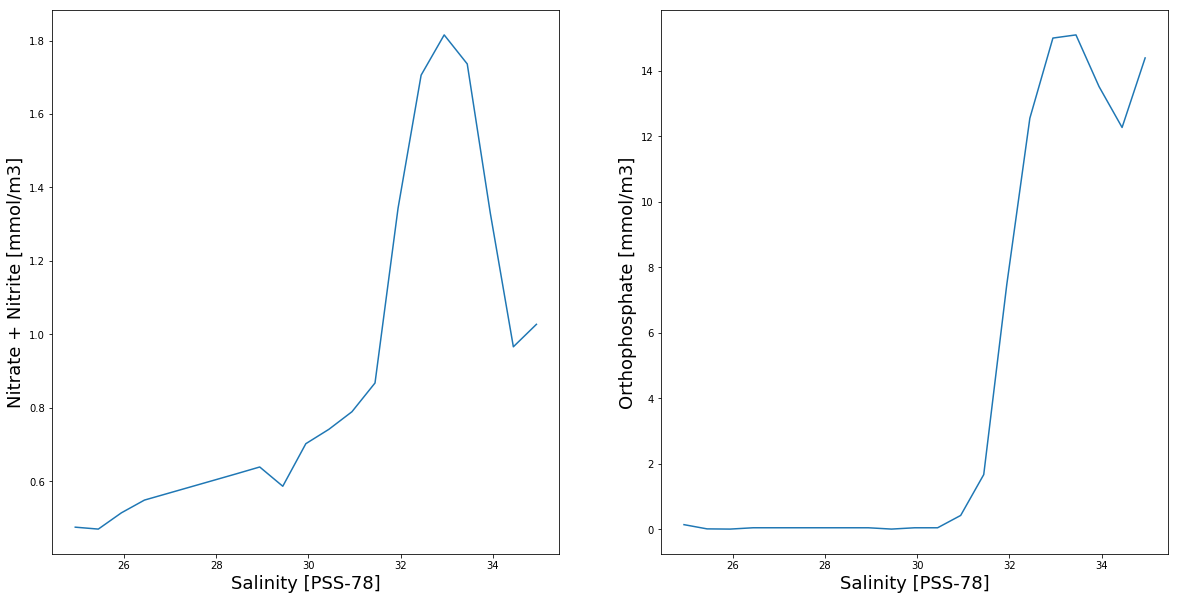

In [9]:
nutrients = [PO4_smooth, NO3_smooth]
nutrient_names = ['Nitrate + Nitrite [mmol/m3]', 'Orthophosphate [mmol/m3]']

fig, axes = plt.subplots(1,2,figsize=(20, 10))
for ax, nutrient, nutrient_name in zip(axes.flatten(), nutrients, nutrient_names):
    ax.plot(salt_new, nutrient)
    ax.set_ylabel(nutrient_name, fontsize=18)
    ax.set_xlabel('Salinity [PSS-78]', fontsize=18)